In [1]:
# To read the dataset into a data frame, run this cell
# https://drive.google.com/file/d/1kSAaGB0jU2X_6Q4hoRf7klDTOSQMCd_a/view

system("gdown --id 1kSAaGB0jU2X_6Q4hoRf7klDTOSQMCd_a")
cookie_cats = read.csv("cookie_cats.csv")

In [2]:
# To learn more about the structure and variables of the dataset, use str() and head()
str(cookie_cats)
head(cookie_cats)

'data.frame':	90189 obs. of  5 variables:
 $ userid        : int  116 337 377 483 488 540 1066 1444 1574 1587 ...
 $ version       : chr  "gate_30" "gate_30" "gate_40" "gate_40" ...
 $ sum_gamerounds: int  3 38 165 1 179 187 0 2 108 153 ...
 $ retention_1   : chr  "False" "True" "True" "False" ...
 $ retention_7   : chr  "False" "False" "False" "False" ...


,userid,version,sum_gamerounds,retention_1,retention_7
,<int>,<chr>,<int>,<chr>,<chr>
1,116,gate_30,3,False,False
2,337,gate_30,38,True,False
3,377,gate_40,165,True,False
4,483,gate_40,1,False,False
5,488,gate_40,179,True,True
6,540,gate_40,187,True,True


In [3]:
install.packages("naniar")
library(naniar)
# First, let's check if the data contains any missing values
n_miss(cookie_cats)

# Let's check if there are any duplicates using duplicated()
duplicated(cookie_cats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




[1] 0

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [4]:
# Next, let's find the number of players who came back to play after 1 day or 7 days of installing using sum()
# Note: retention_1 and retention_7 are character variables not bool, find the appropriate function to convert them
cookie_cats$retention_1<-ifelse(cookie_cats$retention_1=="True",1,0)
sum(cookie_cats$retention_1)
cookie_cats$retention_7<-ifelse(cookie_cats$retention_7=="True",1,0)
sum(cookie_cats$retention_7)

[1] 40153

[1] 16781

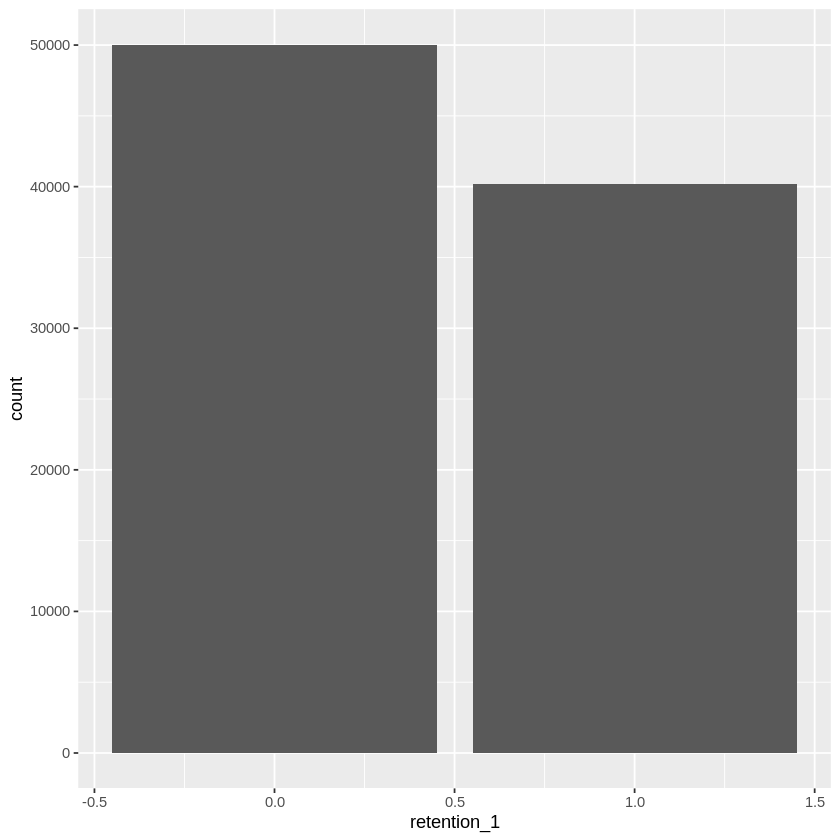

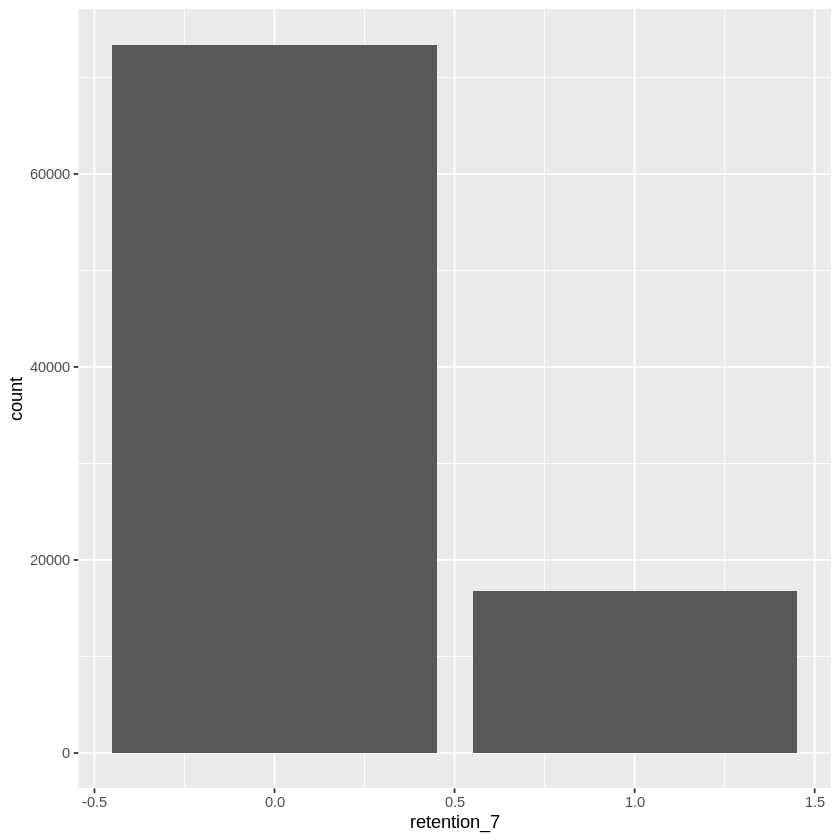

In [5]:
# Let's now display retention_1 and retention_7 separately using a barplot
library(ggplot2)
ggplot(cookie_cats,aes(x=retention_1))+geom_bar()
ggplot(cookie_cats,aes(x=retention_7))+geom_bar()

In [6]:
# Finally, let's use summary() to find summaries regarding each variable
summary(cookie_cats)

     userid          version          sum_gamerounds      retention_1    
 Min.   :    116   Length:90189       Min.   :    0.00   Min.   :0.0000  
 1st Qu.:2512230   Class :character   1st Qu.:    5.00   1st Qu.:0.0000  
 Median :4995815   Mode  :character   Median :   16.00   Median :0.0000  
 Mean   :4998412                      Mean   :   51.87   Mean   :0.4452  
 3rd Qu.:7496452                      3rd Qu.:   51.00   3rd Qu.:1.0000  
 Max.   :9999861                      Max.   :49854.00   Max.   :1.0000  
  retention_7    
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.1861  
 3rd Qu.:0.0000  
 Max.   :1.0000  

When a player installed the game, he or she was randomly assigned to either **gate_30** or **gate_40**. As a sanity check, let's see if there are roughly the same number of players in each AB group.

In [7]:
# Counting the number of players in each A/B group.(gate30 / gate40)
library(tidyverse)
library(dplyr)
install.packages("infer")
library(infer)
cookie_cats$retention_1<-ifelse(cookie_cats$retention_1==1,"True","False")
cookie_cats$retention_7<-ifelse(cookie_cats$retention_7==1,"True","False")
 cookie_cats %>%
 count(version)
  

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘patchwork’




version,n
<chr>,<int>
gate_30,44700
gate_40,45489


Warning message:
“Removed 12385 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


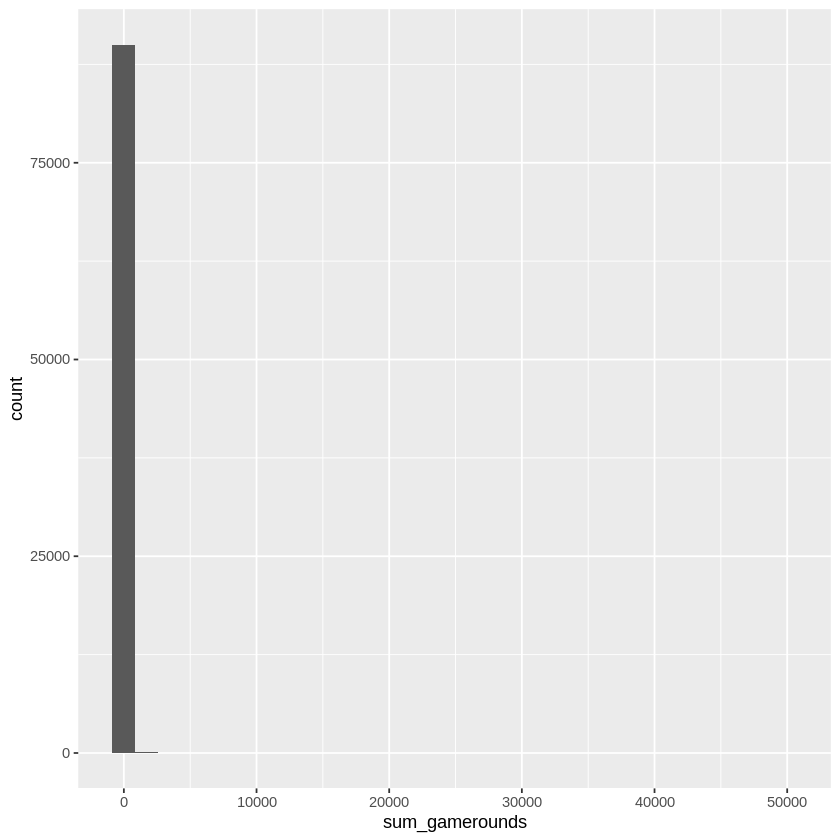

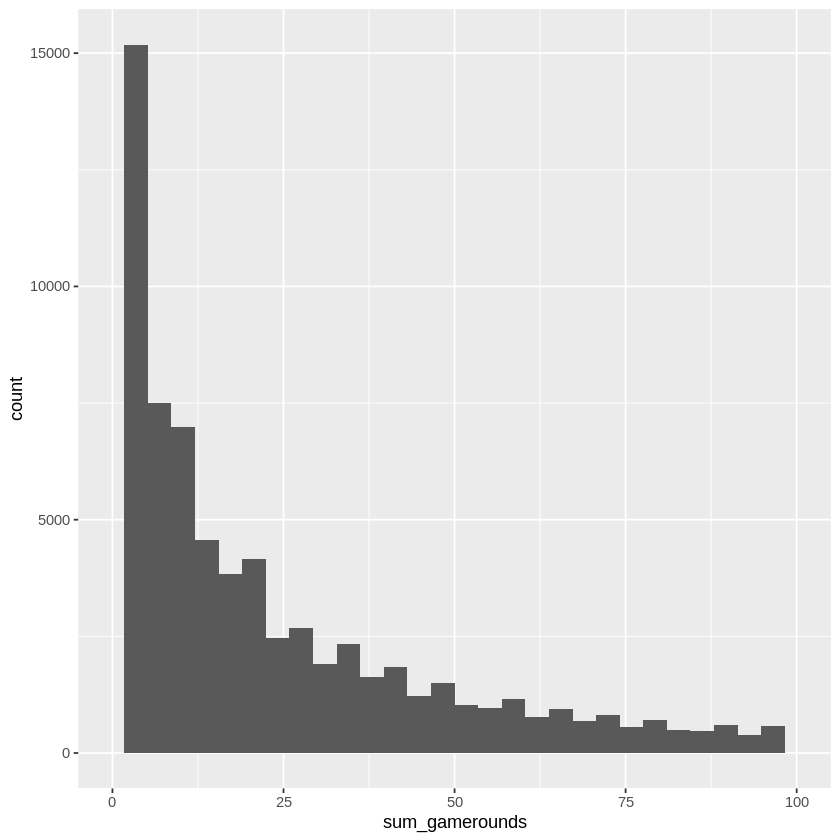

In [8]:
# The distribution of game rounds
library(tidyverse)
library(dplyr)
library(ggplot2)
ggplot(cookie_cats,aes(x = sum_gamerounds))+geom_histogram(bins = 30)

# Plotting the distribution of players that played 0 to 100 game rounds
ggplot(cookie_cats,aes(x=sum_gamerounds))+geom_histogram(bins = 30)+xlim(0,100) 


In [9]:
# The % of users that came back the day(retention_1) after they installed
library(tidyverse)
library(dplyr)
 cookie_cats %>%
group_by(version="gate_30") %>%
summarize(p1=mean(retention_1=="True")*100)


# The % of users that came back a week(retention_7) after they installed
library(tidyverse)
library(dplyr)
 cookie_cats %>%
group_by(version="gate_40") %>%
summarize(p2=mean(retention_7=="True")*100)


version,p1
<chr>,<dbl>
gate_30,44.52095


version,p2
<chr>,<dbl>
gate_40,18.60648


:So, a little less than half of the players come back one day after installing the game. 18 percent of the players come back 7 day after installing the game.

Now that we have a benchmark, let's look at how retention rates differs between the two  groups(gate30 /gate40).





In [10]:
#Calculating the percentage of 1-day retention for each A/B group
library(tidyverse)
library(dplyr)
 cookie_cats %>%
group_by(version) %>%
summarize(p1=mean(retention_1=="True")*100)
#Calculating the percentage of 7-days retention for each A/B group
library(tidyverse)
library(dplyr)
 cookie_cats %>%
group_by(version) %>%
summarize(p1=mean(retention_7=="True")*100)

version,p1
<chr>,<dbl>
gate_30,44.81879
gate_40,44.22827


version,p1
<chr>,<dbl>
gate_30,19.02013
gate_40,18.20000


There was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control group when it was at level 30 (44.8%).

Again,a decrease in 7-day retention when the gate was moved to level 40 (18.2%) compared to the control group when it was at level 30 (19.8%).

It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use **bootstrapping**.

In [11]:
# Creating an list with bootstrapped means(NULL distribution) for group ( retention_1)
install.packages("infer")
library(infer)
data<-cookie_cats %>%
specify(retention_1~version,success="True")%>%
hypothesize(null="independence")%>%
generate(reps=500,type="permute")%>%
calculate(stat="diff in props",order=c("gate_30","gate_40"))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
#calculate the observed statistics (actual statistics)
library(tidyverse)
library(dplyr)
point_estimate<-cookie_cats %>%
group_by(version)%>%
summarize(prop_re1 = mean(as.logical(retention_1))) %>%
#summarize(prop_re1=mean(retention_1=="True"))%>%
summarize(diff(prop_re1))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



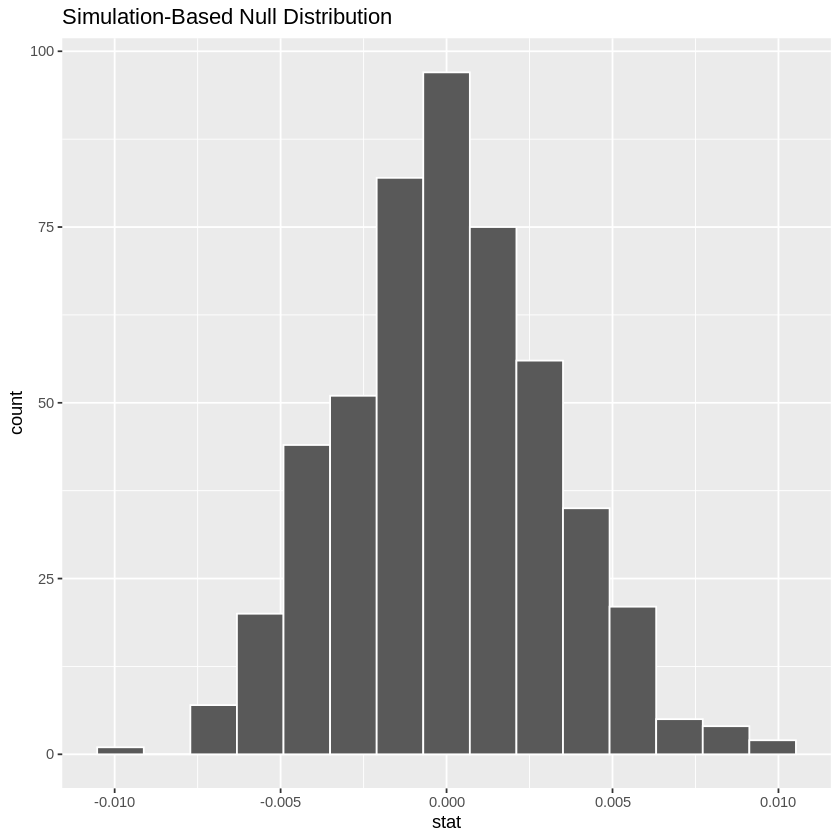

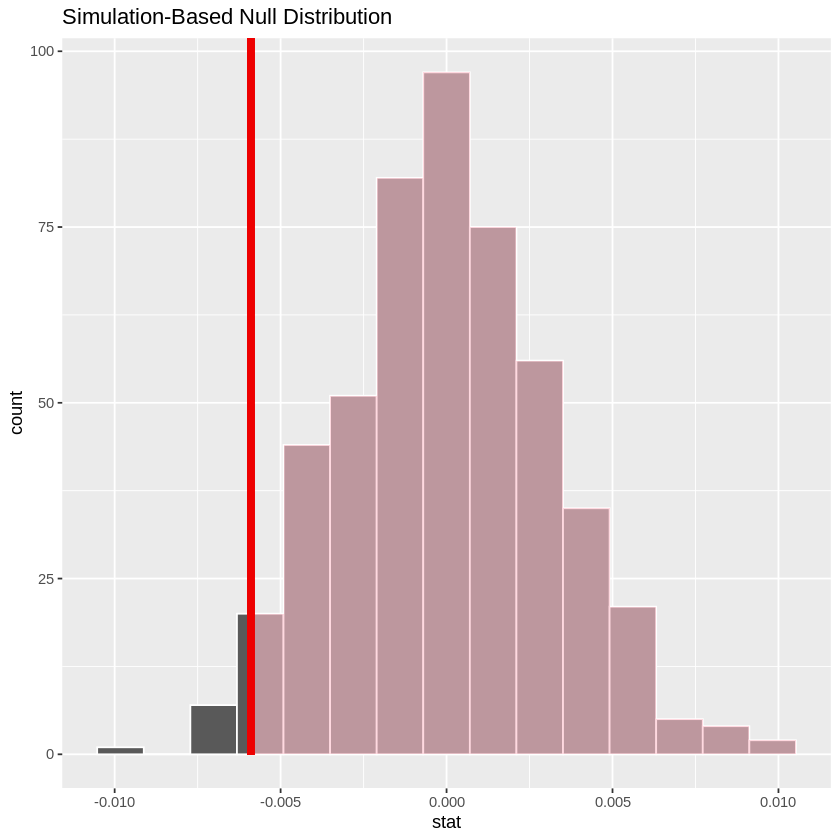

In [13]:
#plot the null distrbiution (the list with bootstrapped props)
library(tidyverse)
library(dplyr)
library(ggplot2)
data %>% visualize()
#then plot a line to represent the observed differnce 
install.packages("infer")
library(infer)
library(ggplot2)
library(tidyverse)
library(dplyr)
data %>%
visualize()+
shade_p_value(obs_stat = point_estimate, direction = "right" )

#Note: if you used the function shape_p_value(),set the value for the argument direction to "right"



In [14]:
#calculate the p_value 
library(tidyverse)
library(dplyr)
p_value<- data %>%
get_p_value(obs_stat = point_estimate,direction = "right")
p_value
#Note: if you used the function get_p_value(),set the value for the argument direction to "right"



p_value
<dbl>
0.97


The p_value for retention_1 is greater than 0.005 and that means we shouldn't move away from the null hypothesis (we fail to reject the null hypothesis ) ,that means the gate **should be kept at level 30.**



The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the gate is at level 30. However, since players have only been playing the game for one day, it is likely that most players haven't reached level 30 yet. That is, many players won't have been affected by the gate, even if it's as early as level 30.

But after having played for a week, more players should have reached level 40, and therefore it makes sense to also look at 7-day retention. That is: What percentage of the people that installed the game also showed up a week later to play the game again.

**Let's start by calculating 7-day retention for the two groups.**

In [15]:
# Creating an list with bootstrapped props(NULL distribution) for group(retention_7)

install.packages("infer")
library(infer)
dataa<-cookie_cats %>%
specify(retention_7~version,success="True")%>%
hypothesize(null="independence")%>%
generate(reps=500,type="permute")%>%
calculate(stat="diff in props",order=c("gate_30","gate_40"))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
#calculate the observed statistics (actual statistics)
library(tidyverse)
library(dplyr)
point_estimatee<-cookie_cats %>%
group_by(version)%>%
summarize(prop_re7 = mean(as.logical(retention_7))) %>%
#summarize(prop_re1=mean(retention_7=="True"))%>%
summarize(diff(prop_re7))



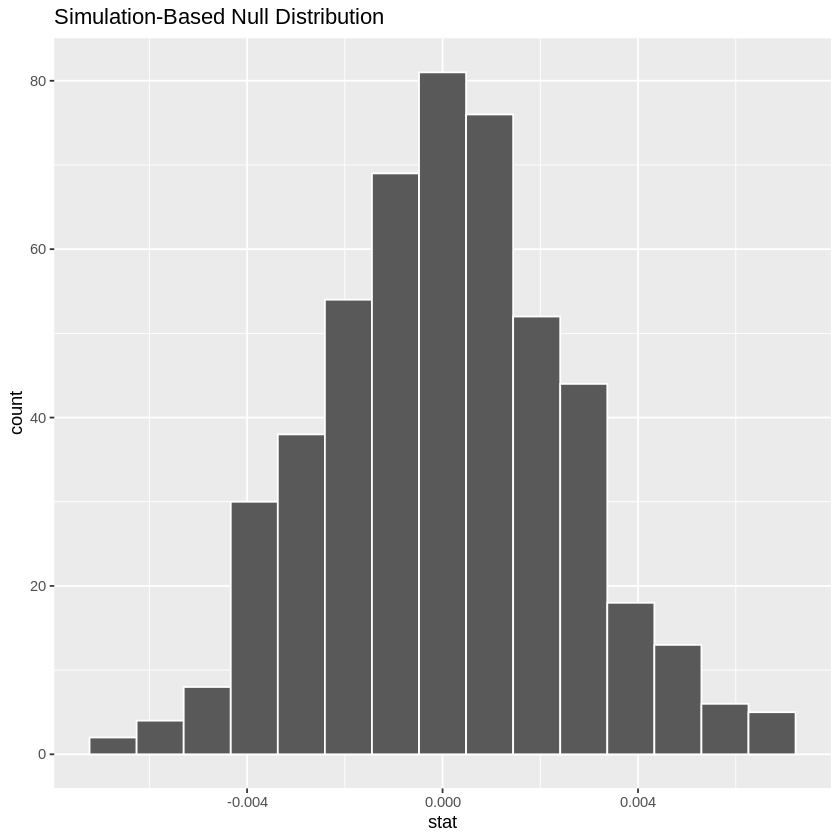

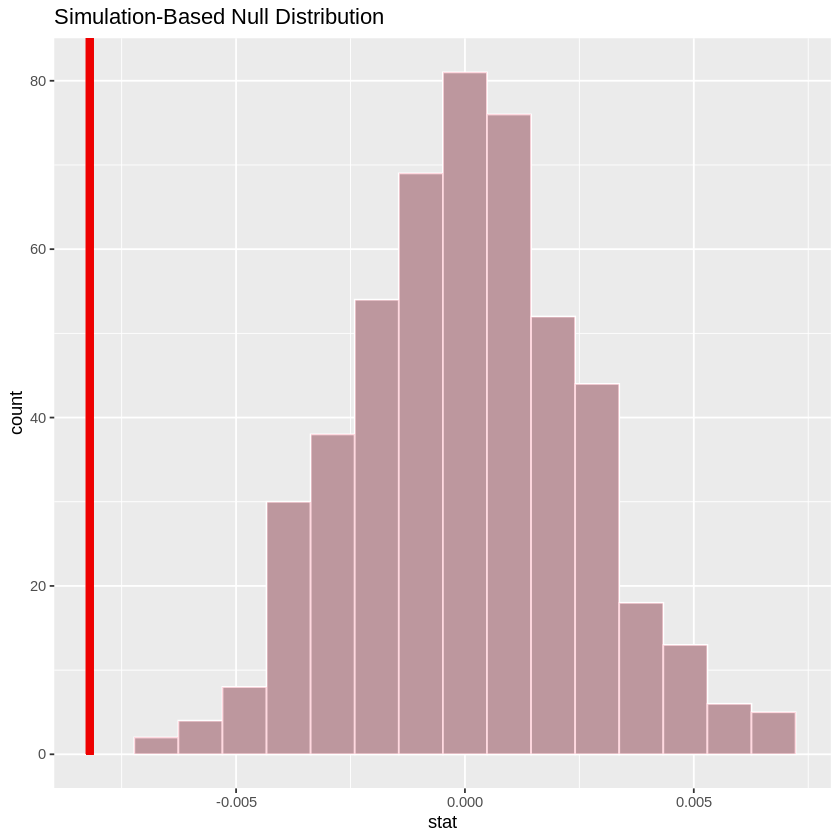

In [17]:
#plot the null distrbiution (the list with bootstrapped props)
library(tidyverse)
library(dplyr)
library(ggplot2)
dataa %>% visualize()
#then plot a line to represent the observed differnce 
dataa%>%
visualize+shade_p_value(obs_stat = point_estimatee,direction = "right")
#Note: if you used the function shape_p_value(),set the value for the argument direction to "right"




In [18]:
#calculating the p_value for retention_7
p_value<-dataa%>%
get_p_value(obs_stat = point_estimatee,direction = "right")
p_value
#Note: if you used the function get_p_value(),set the value for the argument direction to "right"



p_value
<dbl>
1


 The conclusion

If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two groups. But retention is one of the most important metrics.
